<a href="https://colab.research.google.com/github/m-gopinath23/DataScienceProject/blob/main/M_Gopinath_(2022BMM1005).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This block is only for access of files using google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import matplotlib.pyplot as plt
import numpy as np;
from random import shuffle;
from tqdm import tqdm;
import pickle

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

train_Normal_File = drive.CreateFile({'id': '1tQaJjOhCDUfutK4gUmUxbORhO31Fc255'});
train_Pneumonia_File = drive.CreateFile({'id': '1-TcsGSDO2oktO9td99BvOyCq4-jACOin'});

test_Normal_File = drive.CreateFile({'id': '1gsGgnn5sCuLM4lcr-0FEhuqCs3FLPXJp'});
test_Pneumonia_File = drive.CreateFile({'id': '1V8yWCFv2VO7qtBN4aclAdfhA3EpXNxdH'});

In [ ]:
train_Normal_File.GetContentFile("X_train_N.npy");
train_Pneumonia_File.GetContentFile("X_train_P.npy");
test_Normal_File.GetContentFile("X_test_N.npy");
test_Pneumonia_File.GetContentFile("X_test_P.npy");

X_train_N = np.load("X_train_N.npy");     # Normal X-rays: Training
X_train_P = np.load("X_train_P.npy");     # Pneumonia X-rays: Training

X_test_N = np.load("X_test_N.npy");       # Normal X-rays: Testing
X_test_P = np.load("X_test_P.npy");       # Pneumonia X-rays: Testing

In [ ]:
print("X_train_Normal shape: ", X_train_N.shape);
print("X_train_PNEUMONIA shape: ", X_train_P.shape);
print("X_test_Normal shape: ", X_test_N.shape);
print("X_test_PNEUMONIA shape: ", X_test_P.shape);

X_train_Normal shape:  (1341, 150, 150, 1)
X_train_PNEUMONIA shape:  (3875, 150, 150, 1)
X_test_Normal shape:  (234, 150, 150, 1)
X_test_PNEUMONIA shape:  (390, 150, 150, 1)


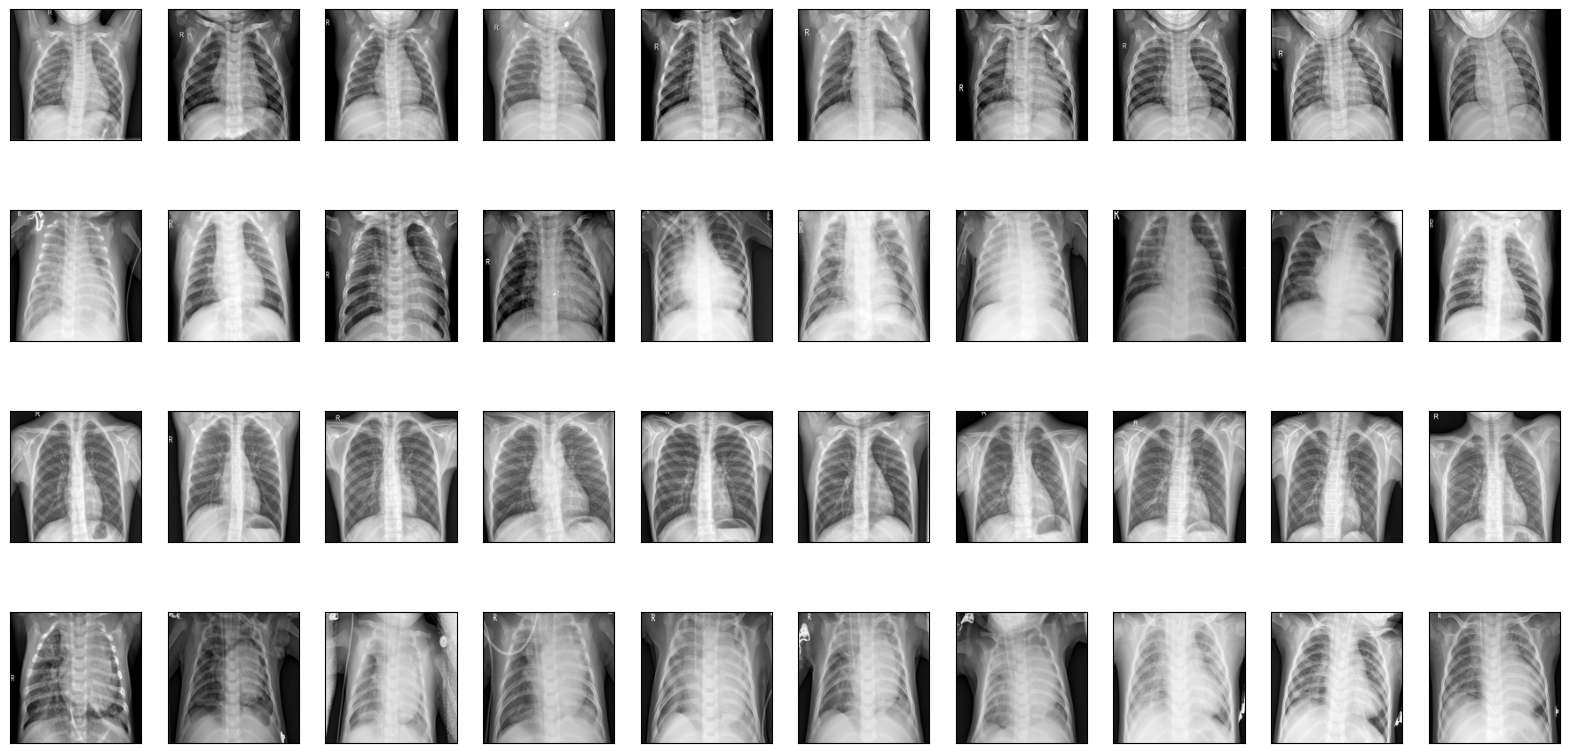

In [ ]:
# Plotting n(=10) X-rays from all databases:
# Row1:X_train_Normal, Row2:X_train_Pneumonia, Row3:X_test_Normal, Row4:X_test_Pneumonia

n = 10
plt.figure(figsize=(20, 10))
for i in range(n):
    ax = plt.subplot(4, n, i+1)
    plt.imshow(X_train_N[i,:,:].reshape(150,150), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(4, n, i+1*n+1)
    plt.imshow(X_train_P[i,:,:].reshape(150,150), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(4, n, i+2*n+1)
    plt.imshow(X_test_N[i,:,:].reshape(150,150), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(4, n, i+3*n+1)
    plt.imshow(X_test_P[i,:,:].reshape(150,150), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(150,150,1)))

model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='sigmoid'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 146, 146, 32)      832       
                                                                 
 conv2d_5 (Conv2D)           (None, 142, 142, 64)      51264     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 71, 71, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 69, 69, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 34, 34, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 256)      

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
X_train = np.concatenate((X_train_N, X_train_P), axis=0)
X_test = np.concatenate((X_test_N, X_test_P), axis=0)

y_train = np.concatenate((np.zeros(X_train_N.shape[0]), np.ones(X_train_P.shape[0])), axis=0)
y_test = np.concatenate((np.zeros(X_test_N.shape[0]), np.ones(X_test_P.shape[0])), axis=0)

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)


In [ ]:
# Training the model
history = model.fit(X_train, y_train,validation_data=(X_test, y_test),epochs=300, batch_size=80)


Epoch 1/300
66/66 [==============================] - 25s 231ms/step - loss: 0.6209 - accuracy: 0.7318 - val_loss: 0.6610 - val_accuracy: 0.6250
Epoch 2/300
66/66 [==============================] - 12s 185ms/step - loss: 0.5941 - accuracy: 0.7410 - val_loss: 0.6653 - val_accuracy: 0.6250
Epoch 3/300
66/66 [==============================] - 12s 183ms/step - loss: 0.4991 - accuracy: 0.7657 - val_loss: 0.4851 - val_accuracy: 0.7244
Epoch 4/300
66/66 [==============================] - 12s 187ms/step - loss: 0.2720 - accuracy: 0.8846 - val_loss: 0.4677 - val_accuracy: 0.8013
Epoch 5/300
66/66 [==============================] - 12s 182ms/step - loss: 0.1880 - accuracy: 0.9277 - val_loss: 0.4888 - val_accuracy: 0.8189
Epoch 6/300
66/66 [==============================] - 12s 185ms/step - loss: 0.1575 - accuracy: 0.9415 - val_loss: 0.9977 - val_accuracy: 0.7468
Epoch 7/300
66/66 [==============================] - 12s 181ms/step - loss: 0.1313 - accuracy: 0.9505 - val_loss: 0.8888 - val_accuracy:

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

20/20 [==============================] - 1s 26ms/step - loss: 5.9443 - accuracy: 0.7724
Accuracy =  77.24359035491943 %


1/1 [==============================] - 0s 18ms/step


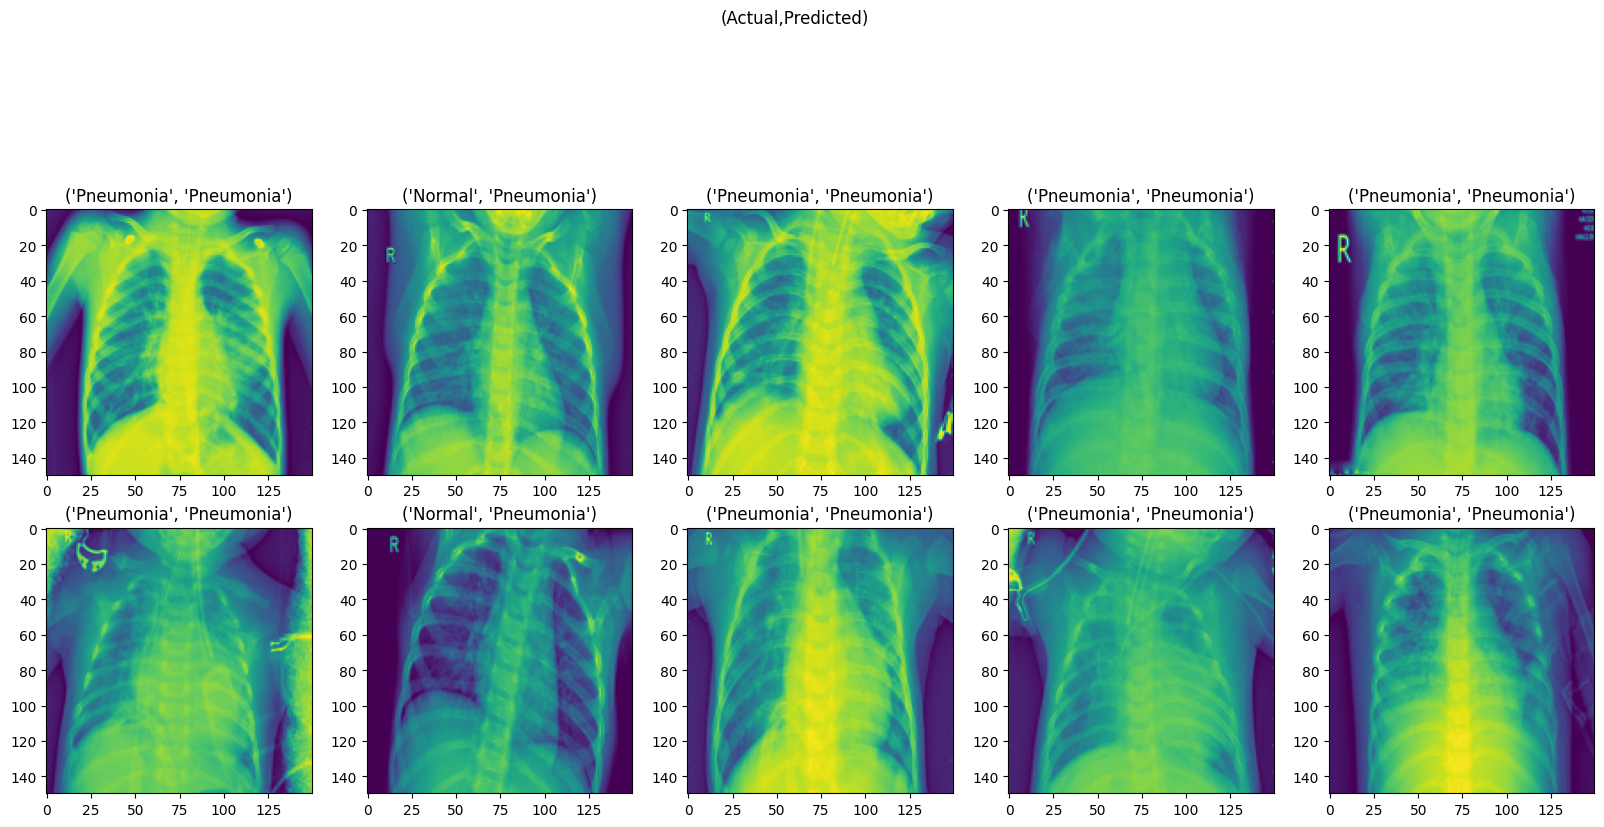

In [ ]:
#Display a few arbitrary test photos together with their real and predicted labels.

count = 0;
Num_of_Images = 10;
plt.figure(figsize=(20,20))
plt.suptitle("(Actual,Predicted)")
label = ['Normal', 'Pneumonia'];
for i in np.random.randint(X_test.shape[0], size = Num_of_Images):
  count = count+1;
  plt.subplot(int(Num_of_Images/2),5, count);
  plt.imshow(X_test[i].reshape((150,150)));
  P = model.predict(X_test[i].reshape(1,150,150));
  index = np.argmax(P);
  plt.title((label[np.argmax(y_test[i])], label[index]));